In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

import andes

import scienceplots

from tqdm import tqdm

In [2]:
matplotlib.use('Agg')
plt.style.use(['science','ieee'])

In [3]:
andes.__version__

'1.8.7.post5+gb9281204'

In [4]:
cwd = os.getcwd()

In [5]:
ss = andes.load(os.path.join(cwd, '../data/case/ieee39_evsfr.xlsx'))

In [6]:
# Construct the file paths relative to the current working directory ev_s_path
ev_s_short_path = os.path.join(cwd, '../data/output/ieee39_ev_s_out_short.csv')
ev_f_short_path = os.path.join(cwd, '../data/output/ieee39_ev_f_out_short.csv')
ev_fict_short_path = os.path.join(cwd, '../data/output/ieee39_ev_fict_out_short.csv')

# Read the CSV files into pandas dataframes
dfs = pd.read_csv(ev_s_short_path)
dff = pd.read_csv(ev_f_short_path)
dfict = pd.read_csv(ev_fict_short_path)

evs_path = os.path.join(cwd, '../data/output/cosim_ieee39_s_sse.csv')
evf_path = os.path.join(cwd, '../data/output/cosim_ieee39_f_sse.csv')
evfict_path = os.path.join(cwd, '../data/output/cosim_ieee39_fict_sse.csv')

evs = pd.read_csv(evs_path)
evf = pd.read_csv(evf_path)
evfict = pd.read_csv(evfict_path)

In [7]:
%matplotlib inline

In [8]:
# Filter out items that contain "EV"
pev_out_dfict = ss.config.mva * dfict['v Bus 29'] * dfict['Ipout_y EV2 EV 1']
pev_ref_dfict = ss.config.mva * dfict['Pext EV2 EV 1']
pev_out_dff = ss.config.mva * dff['v Bus 29'] * dff['Ipout_y EV2 EV 1']
pev_ref_dff = ss.config.mva * dff['Pext EV2 EV 1']
pev_out_dfs = ss.config.mva * dfs['v Bus 29'] * dfs['Ipout_y EV2 EV 1']
pev_ref_dfs = ss.config.mva * dfs['Pext EV2 EV 1']

# Filter out items that contain "EV"
colf = [item for item in dfict.columns if "f BusFreq" in item]

freq_dfict = ss.config.freq * dfict[colf].mean(axis=1)
freq_dff = ss.config.freq * dff[colf].mean(axis=1)
freq_dfs = ss.config.freq * dfs[colf].mean(axis=1)


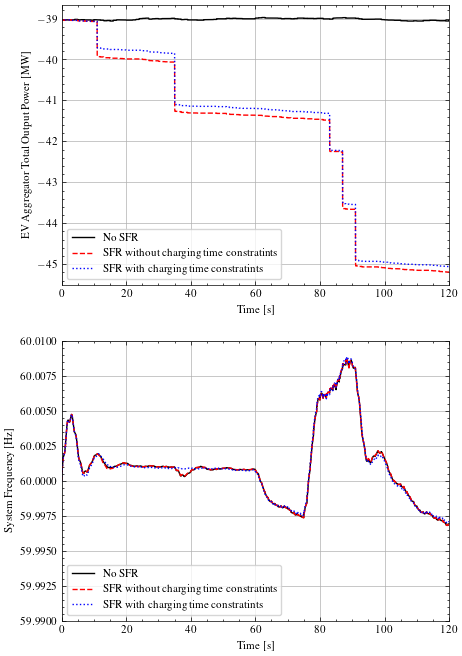

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 8), dpi=100)
fig.subplots_adjust(hspace=0.2)

# Plot the first subplot in the left column
axs[0].plot(dfict['Time [s]'], pev_out_dfs, label='No SFR')
axs[0].plot(dfict['Time [s]'], pev_out_dff, label='SFR without charging time constratints')
axs[0].plot(dfict['Time [s]'], pev_out_dfict, label='SFR with charging time constratints')
axs[0].set_ylabel('EV Aggregator Total Output Power [MW]')

# Plot the second subplot in the right column
axs[1].plot(dfict['Time [s]'], freq_dfict, label='No SFR')
axs[1].plot(dfict['Time [s]'], freq_dff, label='SFR without charging time constratints')
axs[1].plot(dfict['Time [s]'], freq_dfs, label='SFR with charging time constratints')
axs[1].set_ylabel('System Frequency [Hz]')
axs[1].set_ylim([59.99, 60.01])

axs[1].ticklabel_format(useOffset=False)

for ax in axs.flat:
    ax.set(xlabel='Time [s]')
    ax.set_xlim([0, 120])
    ax.grid()
    ax.legend(loc='lower left', frameon=True)

plt.show()


In [10]:
# assuming your dataframe is called df
img_path = os.path.join(cwd, '../data/img/evsfr')

def create_frame(t):
    figa, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 8), dpi=100)
    plt.tight_layout()
    fig.subplots_adjust(hspace=0.2)

    # Plot the first subplot in the left column
    axs[0].plot(dfict['Time [s]'].iloc[0:t], pev_out_dfs[0:t], label='No SFR')
    axs[0].plot(dfict['Time [s]'].iloc[0:t], pev_out_dff[0:t], label='SFR without charging time constratints')
    axs[0].plot(dfict['Time [s]'].iloc[0:t], pev_out_dfict[0:t], label='SFR with charging time constratints')
    axs[0].plot(dfict['Time [s]'].iloc[0:t],
                pev_out_dfs[0:t], pev_out_dff[0:t], pev_out_dfict[0:t])
    axs[0].legend(['No SFR', 'SFR without charging time constratints', 'SFR with charging time constratints'],
                  loc='lower left', frameon=True)
    axs[0].set_ylabel('EV Aggregator Total Output Power [MW]')
    axs[0].set_ylim([-50, -35])

    # Plot the second subplot in the right column
    axs[1].plot(dfict['Time [s]'].iloc[0:t], freq_dfict[0:t], label='No SFR')
    axs[1].plot(dfict['Time [s]'].iloc[0:t], freq_dff[0:t], label='SFR without charging time constratints')
    axs[1].plot(dfict['Time [s]'].iloc[0:t], freq_dfs[0:t], label='SFR with charging time constratints')
    axs[1].set_ylabel('System Frequency [Hz]')
    axs[1].set_ylim([59.99, 60.01])

    axs[1].ticklabel_format(useOffset=False)

    for ax in axs.flat:
        ax.set(xlabel='Time [s]')
        ax.set_xlim([0, 120])
        ax.grid()
        ax.legend(loc='lower left', frameon=True)

    figa.savefig(f'{img_path}/img_{t}.png',
                 transparent=False,
                 facecolor='white',
                 bbox_inches='tight',
                 )
    plt.close(figa)

In [11]:
lenv = dfict.shape[0]

In [ ]:
for t in tqdm(range(0, 1000)):
    create_frame(t)

In [ ]:
for t in tqdm(range(1000, 2000)):
    create_frame(t)

In [ ]:
for t in tqdm(range(2000, 3000)):
    create_frame(t)

In [ ]:
for t in tqdm(range(3000, lenv)):
    create_frame(t)

In [12]:
# assuming your images are named as "img_0.png", "img_1.png", ..., "img_2999.png"
img_path = os.path.join(cwd, '../data/img/evsfr')
images = [f"{img_path}/img_{i}.png" for i in range(lenv)]

In [13]:
clip = ImageSequenceClip(images, fps=30)

In [14]:
clip.write_videofile(os.path.join(img_path, 'evsfr.mp4'))

Moviepy - Building video /Users/jinningwang/Documents/work/demo/demo/notes/../data/img/evsfr/evsfr.mp4.
Moviepy - Writing video /Users/jinningwang/Documents/work/demo/demo/notes/../data/img/evsfr/evsfr.mp4



Moviepy - Done !
Moviepy - video ready /Users/jinningwang/Documents/work/demo/demo/notes/../data/img/evsfr/evsfr.mp4
